# API-REST: AEMET OPEN DATA 

En este notebook veremos otro ejemplo de uso de la api open data de AEMET. En este caso obtendremos parámetros medidos por una estación meteorológica.

In [1]:
import requests

In [2]:
# Cargamos la api key 
api_key = open("../../apikey-aemet.txt").read().rstrip()

querystring = {"api_key": api_key}

## Obtención de un listado con todas las estaciones 

In [3]:
# Obtenemos información de todas als estaciones disponibles
url = "https://opendata.aemet.es/opendata/api/valores/climatologicos/inventarioestaciones/todasestaciones"

In [4]:
# Realizamos la request
r = requests.get(url, params=querystring, verify=False)

/home/asaez/miniconda3/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [5]:
# Obtenemos el link del que descargaremos los datos
data_url = r.json()['datos']
r_data = requests.get(data_url, params=querystring, verify=False)

/home/asaez/miniconda3/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [6]:
# Vemos el contenido
stations = r_data.json()
stations

[{'altitud': '98',
  'indicativo': '1387E',
  'indsinop': '08002',
  'latitud': '431825N',
  'longitud': '082219W',
  'nombre': 'A CORUÑA AEROPUERTO',
  'provincia': 'A CORUÑA'},
 {'altitud': '58',
  'indicativo': '1387',
  'indsinop': '08001',
  'latitud': '432157N',
  'longitud': '082517W',
  'nombre': 'A CORUÑA',
  'provincia': 'A CORUÑA'},
 {'altitud': '50',
  'indicativo': '1393',
  'indsinop': '08006',
  'latitud': '430938N',
  'longitud': '091239W',
  'nombre': 'CABO VILAN',
  'provincia': 'A CORUÑA'},
 {'altitud': '80',
  'indicativo': '1351',
  'indsinop': '08004',
  'latitud': '434710N',
  'longitud': '074105W',
  'nombre': 'ESTACA DE BARES',
  'provincia': 'A CORUÑA'},
 {'altitud': '230',
  'indicativo': '1400',
  'indsinop': '08040',
  'latitud': '425529N',
  'longitud': '091729W',
  'nombre': 'FISTERRA',
  'provincia': 'A CORUÑA'},
 {'altitud': '685',
  'indicativo': '1437O',
  'indsinop': '08043',
  'latitud': '424314N',
  'longitud': '085524W',
  'nombre': 'MONTE IROITE'

## Obtención de datos de una estación en concreto

#### Estación 111X situada en Santander 

In [7]:
url = ("https://opendata.aemet.es/opendata/api/valores/climatologicos/diarios/datos"
       "/fechaini/2017-01-01T00:00:00UTC/fechafin/2017-01-31T23:59:59UTC/estacion/1111X")

r = requests.get(url, params=querystring, verify=False)
if r.status_code == requests.codes.OK:
    data_url = r.json()['datos']
    r_data = requests.get(data_url, params=querystring, verify=False)
    raw_data = r_data.json()

raw_data

/home/asaez/miniconda3/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/home/asaez/miniconda3/lib/python3.5/site-packages/requests/packages/urllib3/connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[{'altitud': '52',
  'dir': '21',
  'fecha': '2017-01-01',
  'horaPresMax': '00',
  'horaPresMin': '24',
  'horaracha': '07:30',
  'horatmax': '13:40',
  'horatmin': '07:00',
  'indicativo': '1111X',
  'nombre': 'SANTANDER',
  'prec': '0,0',
  'presMax': '1022,0',
  'presMin': '1010,6',
  'provincia': 'CANTABRIA',
  'racha': '6,4',
  'sol': '7,0',
  'tmax': '12,9',
  'tmed': '9,3',
  'tmin': '5,7',
  'velmedia': '2,8'},
 {'altitud': '52',
  'dir': '18',
  'fecha': '2017-01-02',
  'horaPresMax': '24',
  'horaPresMin': 'Varias',
  'horaracha': '06:30',
  'horatmax': '11:30',
  'horatmin': '02:10',
  'indicativo': '1111X',
  'nombre': 'SANTANDER',
  'prec': '0,0',
  'presMax': '1015,4',
  'presMin': '1009,8',
  'provincia': 'CANTABRIA',
  'racha': '10,8',
  'sol': '6,6',
  'tmax': '14,1',
  'tmed': '10,3',
  'tmin': '6,5',
  'velmedia': '5,0'},
 {'altitud': '52',
  'dir': '08',
  'fecha': '2017-01-03',
  'horaPresMax': '23',
  'horaPresMin': '01',
  'horaracha': '02:20',
  'horatmax': '12

## Limpiamos los datos

Se puede ver como los datos que devuelve la api vienen en formato string y con ',' como  separador decimal, lo más cómodo será convertirlos:

In [8]:
def parse_data(raw_data):
    
    data = []
    for d in raw_data:
        d = dict(d)  # Exto copia el parámetro
        for param in ['prec', 'presMax', 'presMin', 'racha', 'sol', 'tmax', 'tmed', 'tmin', 'velmedia', 'altitud', 'dir']:
            try:
                d[param] = float(d[param].replace(',', '.'))
            except:
                d[param] = None
        data.append(d)
    
    return data

In [9]:
data = parse_data(raw_data)
data

[{'altitud': 52.0,
  'dir': 21.0,
  'fecha': '2017-01-01',
  'horaPresMax': '00',
  'horaPresMin': '24',
  'horaracha': '07:30',
  'horatmax': '13:40',
  'horatmin': '07:00',
  'indicativo': '1111X',
  'nombre': 'SANTANDER',
  'prec': 0.0,
  'presMax': 1022.0,
  'presMin': 1010.6,
  'provincia': 'CANTABRIA',
  'racha': 6.4,
  'sol': 7.0,
  'tmax': 12.9,
  'tmed': 9.3,
  'tmin': 5.7,
  'velmedia': 2.8},
 {'altitud': 52.0,
  'dir': 18.0,
  'fecha': '2017-01-02',
  'horaPresMax': '24',
  'horaPresMin': 'Varias',
  'horaracha': '06:30',
  'horatmax': '11:30',
  'horatmin': '02:10',
  'indicativo': '1111X',
  'nombre': 'SANTANDER',
  'prec': 0.0,
  'presMax': 1015.4,
  'presMin': 1009.8,
  'provincia': 'CANTABRIA',
  'racha': 10.8,
  'sol': 6.6,
  'tmax': 14.1,
  'tmed': 10.3,
  'tmin': 6.5,
  'velmedia': 5.0},
 {'altitud': 52.0,
  'dir': 8.0,
  'fecha': '2017-01-03',
  'horaPresMax': '23',
  'horaPresMin': '01',
  'horaracha': '02:20',
  'horatmax': '12:20',
  'horatmin': '08:00',
  'indic

## Haciendo una petición más grande 

La api limita el número de días de los que puede dar información en una misma petición por lo que se queremos obtener datos de un periodo de tiempo largo, necesitamos hacer varias peticiones.

Escribir a mano la fecha inicial y final no es una opción, por lo que usaremos el módulo `datetime` para generar grupos de 30 días consecutivos:

In [10]:
import datetime

Generamos una lista con las fechas que vamos a utilizar para las peticiones

In [11]:
start_date = datetime.datetime(2015, 1, 1, 0, 0, 0)
final_date = datetime.datetime(2015, 4, 1, 0, 0, 0)
step = datetime.timedelta(days=30)

chunks = [start_date]

next_date = start_date + step

while next_date < final_date:
    chunks.append(next_date)
    next_date += step
    
chunks.append(final_date)

chunks

[datetime.datetime(2015, 1, 1, 0, 0),
 datetime.datetime(2015, 1, 31, 0, 0),
 datetime.datetime(2015, 3, 2, 0, 0),
 datetime.datetime(2015, 4, 1, 0, 0)]

In [12]:
# Lo encapsulamos en una función
def generate_chunks(start_date, final_date, step):

    chunks = [start_date]

    next_date = start_date + step

    while next_date < final_date:
        chunks.append(next_date)
        next_date += step

    chunks.append(final_date)

    return chunks

In [13]:
for ii in range(1, len(chunks)):
    print(chunks[ii-1].strftime('%Y-%m-%dT%H:%M:%SUTC'),
          " - ",
          chunks[ii].strftime('%Y-%m-%dT%H:%M:%SUTC'))

2015-01-01T00:00:00UTC  -  2015-01-31T00:00:00UTC
2015-01-31T00:00:00UTC  -  2015-03-02T00:00:00UTC
2015-03-02T00:00:00UTC  -  2015-04-01T00:00:00UTC


In [14]:
import requests
from requests.packages.urllib3.exceptions import InsecureRequestWarning

requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [15]:
import time

In [16]:
start_date = datetime.datetime(2012, 1, 4, 0, 0, 0)
final_date = datetime.datetime(2016, 12, 31, 23, 59, 59)
step = datetime.timedelta(days=30)

chunks = generate_chunks(start_date, final_date, step)

raw_data = []

station = '1111X'


for ii in range(1, len(chunks)):
    print()
    print(chunks[ii-1].strftime('%Y-%m-%dT%H:%M:%SUTC'),
          " - ",
          chunks[ii].strftime('%Y-%m-%dT%H:%M:%SUTC'))

    url = ("https://opendata.aemet.es/opendata/api/valores/climatologicos/diarios/datos/"
           "fechaini/{start}/fechafin/{end}/estacion/{station}".format(
               start=chunks[ii-1].strftime('%Y-%m-%dT%H:%M:%SUTC'),
                end=chunks[ii].strftime('%Y-%m-%dT%H:%M:%SUTC'),
                station=station)
          )
    
    iterate = True
    
    while iterate:

        r = requests.get(url, params=querystring, verify=False)
        
        # Si no me deja hacer la conexión, la repito  
        iterate = (r.status_code == requests.codes.too_many_requests)
        
        print(r.json())

        # Chequeo si la petición ha ido bien    
        if r.status_code == requests.codes.ok:
            # Hago la request para obtener los datos
            data_url = r.json()['datos']
            r_data = requests.get(data_url, params=querystring, verify=False)
            
            # INCONSISTENCIA DE LA API:
            # Cuando no encuentra datos en el rango seleccionado, la API devuelve
            # que el status code es 200 (todo ok) y devuelve un json con el error
            # cuando encuentra, no hay atributo estado            
            try:
                estado = r_data.json()['estado']
            except:
                estado = 200
                
                
            # Si ha ido bien guardo los datos
            if estado == requests.codes.ok:
#                 print(r_data.json())
                raw_data.extend(r_data.json())
            else:
                print(r_data.json()['descripcion'])
        else:
            print(r.json()['descripcion'])

        time.sleep(60/45)
  


2012-01-04T00:00:00UTC  -  2012-02-03T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/a751dd44', 'estado': 200}
No hay datos que satisfagan esos criterios

2012-02-03T00:00:00UTC  -  2012-03-04T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/2f3a78e4', 'estado': 200}

2012-03-04T00:00:00UTC  -  2012-04-03T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/ce5b795a', 'estado': 200}

2012-04-03T00:00:00UTC  -  2012-05-03T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/6b7a6e61', 'estado': 200}

2012-05-03T00:00:00UTC  -  2012-06-02T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendat


2014-06-22T00:00:00UTC  -  2014-07-22T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/b67c4482', 'estado': 200}

2014-07-22T00:00:00UTC  -  2014-08-21T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/a5b7b774', 'estado': 200}

2014-08-21T00:00:00UTC  -  2014-09-20T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/d7a1556c', 'estado': 200}

2014-09-20T00:00:00UTC  -  2014-10-20T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/ebe48879', 'estado': 200}

2014-10-20T00:00:00UTC  -  2014-11-19T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 


2016-07-11T00:00:00UTC  -  2016-08-10T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/16b58994', 'estado': 200}

2016-08-10T00:00:00UTC  -  2016-09-09T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/fac9b46f', 'estado': 200}

2016-09-09T00:00:00UTC  -  2016-10-09T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/39fc2c95', 'estado': 200}

2016-10-09T00:00:00UTC  -  2016-11-08T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 'https://opendata.aemet.es/opendata/sh/56322d90', 'estado': 200}

2016-11-08T00:00:00UTC  -  2016-12-08T00:00:00UTC
{'descripcion': 'exito', 'metadatos': 'https://opendata.aemet.es/opendata/sh/b3aa9d28', 'datos': 

In [17]:
data = parse_data(raw_data)

data[:2]

[{'altitud': 52.0,
  'dir': 7.0,
  'fecha': '2012-03-01',
  'horaPresMax': '11',
  'horaPresMin': 'Varias',
  'horaracha': '15:20',
  'horatmax': '11:00',
  'horatmin': '07:40',
  'indicativo': '1111X',
  'nombre': 'SANTANDER',
  'prec': 0.0,
  'presMax': 1017.3,
  'presMin': 1015.6,
  'provincia': 'CANTABRIA',
  'racha': 7.5,
  'sol': 9.1,
  'tmax': 13.4,
  'tmed': 11.0,
  'tmin': 8.6,
  'velmedia': 4.2},
 {'altitud': 52.0,
  'dir': 28.0,
  'fecha': '2012-03-02',
  'horaPresMax': '23',
  'horaPresMin': '14',
  'horaracha': '17:30',
  'horatmax': '15:00',
  'horatmin': '03:00',
  'indicativo': '1111X',
  'nombre': 'SANTANDER',
  'prec': 0.0,
  'presMax': 1019.3,
  'presMin': 1015.6,
  'provincia': 'CANTABRIA',
  'racha': 7.8,
  'sol': 3.5,
  'tmax': 12.6,
  'tmed': 10.8,
  'tmin': 9.1,
  'velmedia': 3.3}]

## Uniendo los datos en un dataframe

### Salvando y leyendo csvs

In [18]:
import pandas as pd

In [19]:
pd.DataFrame(data[100], index=[0])

,altitud,dir,fecha,horaPresMax,horaPresMin,horaracha,horatmax,horatmin,indicativo,nombre,prec,presMax,presMin,provincia,racha,sol,tmax,tmed,tmin,velmedia
0,52.0,28.0,2012-06-05,00,16,23:40,13:10,04:10,1111X,SANTANDER,0.0,1012.4,1007.5,CANTABRIA,7.2,11.9,20.8,17.2,13.5,1.9


In [20]:
dfs = []
for ii in range(len(data)):
    dfs.append(pd.DataFrame(data[ii], index=[ii]))
    
df = pd.concat(dfs)

In [21]:
df

,altitud,dir,fecha,horaPresMax,horaPresMin,horaracha,horatmax,horatmin,indicativo,nombre,prec,presMax,presMin,provincia,racha,sol,tmax,tmed,tmin,velmedia
0,52.0,7,2012-03-01,11,Varias,15:20,11:00,07:40,1111X,SANTANDER,0,1017.3,1015.6,CANTABRIA,7.5,9.1,13.4,11.0,8.6,4.2
1,52.0,28,2012-03-02,23,14,17:30,15:00,03:00,1111X,SANTANDER,0,1019.3,1015.6,CANTABRIA,7.8,3.5,12.6,10.8,9.1,3.3
2,52.0,99,2012-03-03,17,04,13:40,12:00,06:00,1111X,SANTANDER,0.8,1021.3,1017.8,CANTABRIA,7.2,6.8,17.8,13.7,9.6,2.5
3,52.0,33,2012-03-04,24,07,14:10,11:30,23:59,1111X,SANTANDER,0.8,1026.9,1015.3,CANTABRIA,18.3,1.2,15.6,12.0,8.4,6.4
4,52.0,33,2012-03-04,24,07,14:10,11:30,23:59,1111X,SANTANDER,0.8,1026.9,1015.3,CANTABRIA,18.3,1.2,15.6,12.0,8.4,6.4
5,52.0,35,2012-03-05,Varias,17,02:10,13:40,Varias,1111X,SANTANDER,1,1027.3,1024.3,CANTABRIA,10.3,8.7,11.5,9.5,7.5,3.6
6,52.0,28,2012-03-06,00,17,12:40,13:50,07:00,1111X,SANTANDER,0,1024.4,1021.5,CANTABRIA,7.8,8.9,11.7,8.9,6.1,3.6
7,52.0,29,2012-03-07,23,04,21:20,14:40,05:30,1111X,SANTANDER,2.4,1025.4,1021.1,CANTABRIA,12.5,6.5,13.2,9.3,5.4,3.1
8,52.0,1,2012-03-08,Varias,00,02:10,13:10,23:59,1111X,SANTANDER,0,1031.2,1025.3,CANTABRIA,12.8,6.3,13.1,10.8,8.6,5.8
9,52.0,8,2012-03-09,Varias,14,16:20,11:30,07:00,1111X,SANTANDER,0,1031,1028.6,CANTABRIA,12.2,10.8,13.3,9.9,6.5,6.4


In [22]:
df.to_csv('../data/weather_data.csv', index=None)

In [24]:
data_df = pd.read_csv("../data/weather_data.csv", parse_dates=['fecha'])

In [25]:
data_df.head()

,altitud,dir,fecha,horaPresMax,horaPresMin,horaracha,horatmax,horatmin,indicativo,nombre,prec,presMax,presMin,provincia,racha,sol,tmax,tmed,tmin,velmedia
0,52.0,7.0,2012-03-01,11,Varias,15:20,11:00,07:40,1111X,SANTANDER,0.0,1017.3,1015.6,CANTABRIA,7.5,9.1,13.4,11.0,8.6,4.2
1,52.0,28.0,2012-03-02,23,14,17:30,15:00,03:00,1111X,SANTANDER,0.0,1019.3,1015.6,CANTABRIA,7.8,3.5,12.6,10.8,9.1,3.3
2,52.0,99.0,2012-03-03,17,04,13:40,12:00,06:00,1111X,SANTANDER,0.8,1021.3,1017.8,CANTABRIA,7.2,6.8,17.8,13.7,9.6,2.5
3,52.0,33.0,2012-03-04,24,07,14:10,11:30,23:59,1111X,SANTANDER,0.8,1026.9,1015.3,CANTABRIA,18.3,1.2,15.6,12.0,8.4,6.4
4,52.0,33.0,2012-03-04,24,07,14:10,11:30,23:59,1111X,SANTANDER,0.8,1026.9,1015.3,CANTABRIA,18.3,1.2,15.6,12.0,8.4,6.4


In [26]:
%matplotlib inline

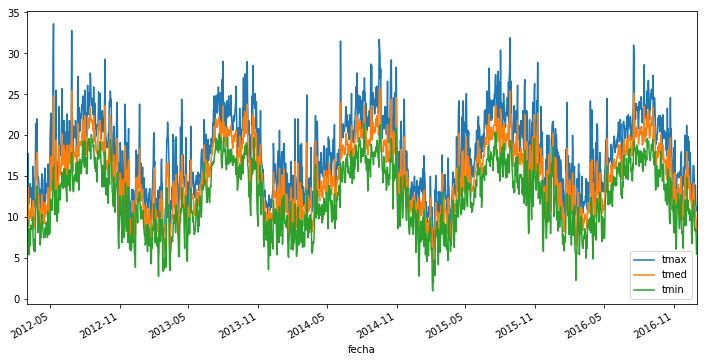

In [27]:
ax = data_df.plot(x='fecha', y=['tmax', 'tmed', 'tmin'], figsize=(12, 6))